# transformation-and-scaling-of-numeric-data

Use the "Run" button to execute the code.

# Transformation and Scaling of Numeric-Data


Most of the time when we are dealing with real world datasets, different columns have different units for the data - for instance one column can be in seconds and another can be kilometers. This means that certain columns may have a very high range of data compared to other columns.

When we use these varied ranges of columns in an Machine Learning (ML) model, there are chances that the columns having larger ranges will have more influence on the target. In order for the model to treat each and every column equally and fairly it is important to transform or scale the data in each column to a similar range. This transformation or scaling of data is also known as **Feature Scaling**.

In this notebook we are going to look at some Scaling techniques that can be used to scale numeric features.

- [MinMax Scaler](#MinMax-Scaler)
- [Standard Scaler](#Standard-Scaler)
- [MaxAbs Scaler](#MaxAbs-Scaler)
- [Robust Scaler](#Robust-Scaler)
- [Quantile Transform Scaler](#Quantile-Transform-Scaler)
- [Power Transformer Scaler](#Power-Transformer-Scaler)
- [Unit Vector Scaler/Normalizer](#Unit-Vector-Scaler/Normalizer)

Al these scalers can be imported from the `sklearn.preprocessing` Python library. It is an open-source library that is used for processing the data for machine learning and Data Science.

# Downloading and reading the data 
The first thing we'll do for is to download and read the data. 

Before that we'll need to install and import all the necessary libraries.<br> After which we'll use the `opendatasets` Library of python by **Jovian** to download the data from Kaggle and we'll use `pd.read_csv` function of pandas library. 

Let's start by installing and importing important libraries.

In [1]:
# Installing necessary libraries
!pip install pandas numpy matplotlib seaborn opendatasets scikit-learn --quiet --upgrade

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import opendatasets as od
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Setting display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
!pip install jovian --upgrade --quiet

In [4]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="transformation-and-scaling-of-numeric-data",outputs=['weather-dataset-rattle-package/weatherAUS.csv'])

<IPython.core.display.Javascript object>

As we have imported the necessary libraries now let's download the dataset from kaggle using opendatasets library.

In [6]:
# Downloading the data
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: satyamtiwari1920
Your Kaggle Key: ········


100%|██████████| 3.83M/3.83M [00:00<00:00, 66.3MB/s]

In [7]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

The data is downloaded and extracted in the "weather-dataset-rattle-package" folder with the file name "weatherAUS.csv". We'll use the `pd.read_csv` function to read this data.

In [8]:
df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [9]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Now that we have downloaded the dataset and created a dataframe `df` using pd.read_csv function we'll perform some general steps of data preparation.<br> These steps include
* Creating Train, Validation and Test sets
* Identifying the input and target columns
* Identifying the Numeric and Categorical columns
* Imputation of missing values

After these steps are completed then we can scale the numeric data using the above mentioned techniques.

As all these steps are covered in my previous article entitled Imputation of Missing Numeric for Data Science we'll not be looking at all these steps in this article. If you want to check those steps out you can find the article by Clicking Here!!

**Note** __[Click Here !!](https://jovian.ai/satyamtiwari1920/imputation-methods)__ If you want to learn more about Imputation of missing values

In [11]:
# Creating Train, Validation and Test sets
year = pd.to_datetime(df.Date).dt.year

train_df = df[year< 2015]
val_df = df[year== 2015]
test_df= df[year>2015]

In [12]:
# Identifying Input and Target columns
input_cols = list(train_df.columns)[1:-1]
target_cols = 'RainTomorrow'

In [13]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()


In [14]:
# Identifying numeric and categorical columns
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [15]:
print('Numeric columns :',numeric_cols)
print('Categorical Columns :',categorical_cols)

Numeric columns : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Categorical Columns : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [16]:
# Check the number of missing values per column
train_inputs[numeric_cols].isna().sum().sort_values(ascending= False)

Sunshine         42008
Evaporation      38486
Cloud3pm         38130
Cloud9am         37105
Pressure9am       9800
Pressure3pm       9766
WindGustSpeed     7623
Rainfall          2031
Humidity9am       1590
Humidity3pm       1504
WindSpeed3pm      1462
WindSpeed9am      1454
Temp9am           1105
Temp3pm            978
MinTemp            736
MaxTemp            534
dtype: int64

In [17]:
# Imputing missing values using Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()
imputer.fit(df[numeric_cols])

train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [18]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Now that we have imputed the missing values we can begin with our Scaling process.

Before scaling the numeric data lets look at the distribution of this numeric data

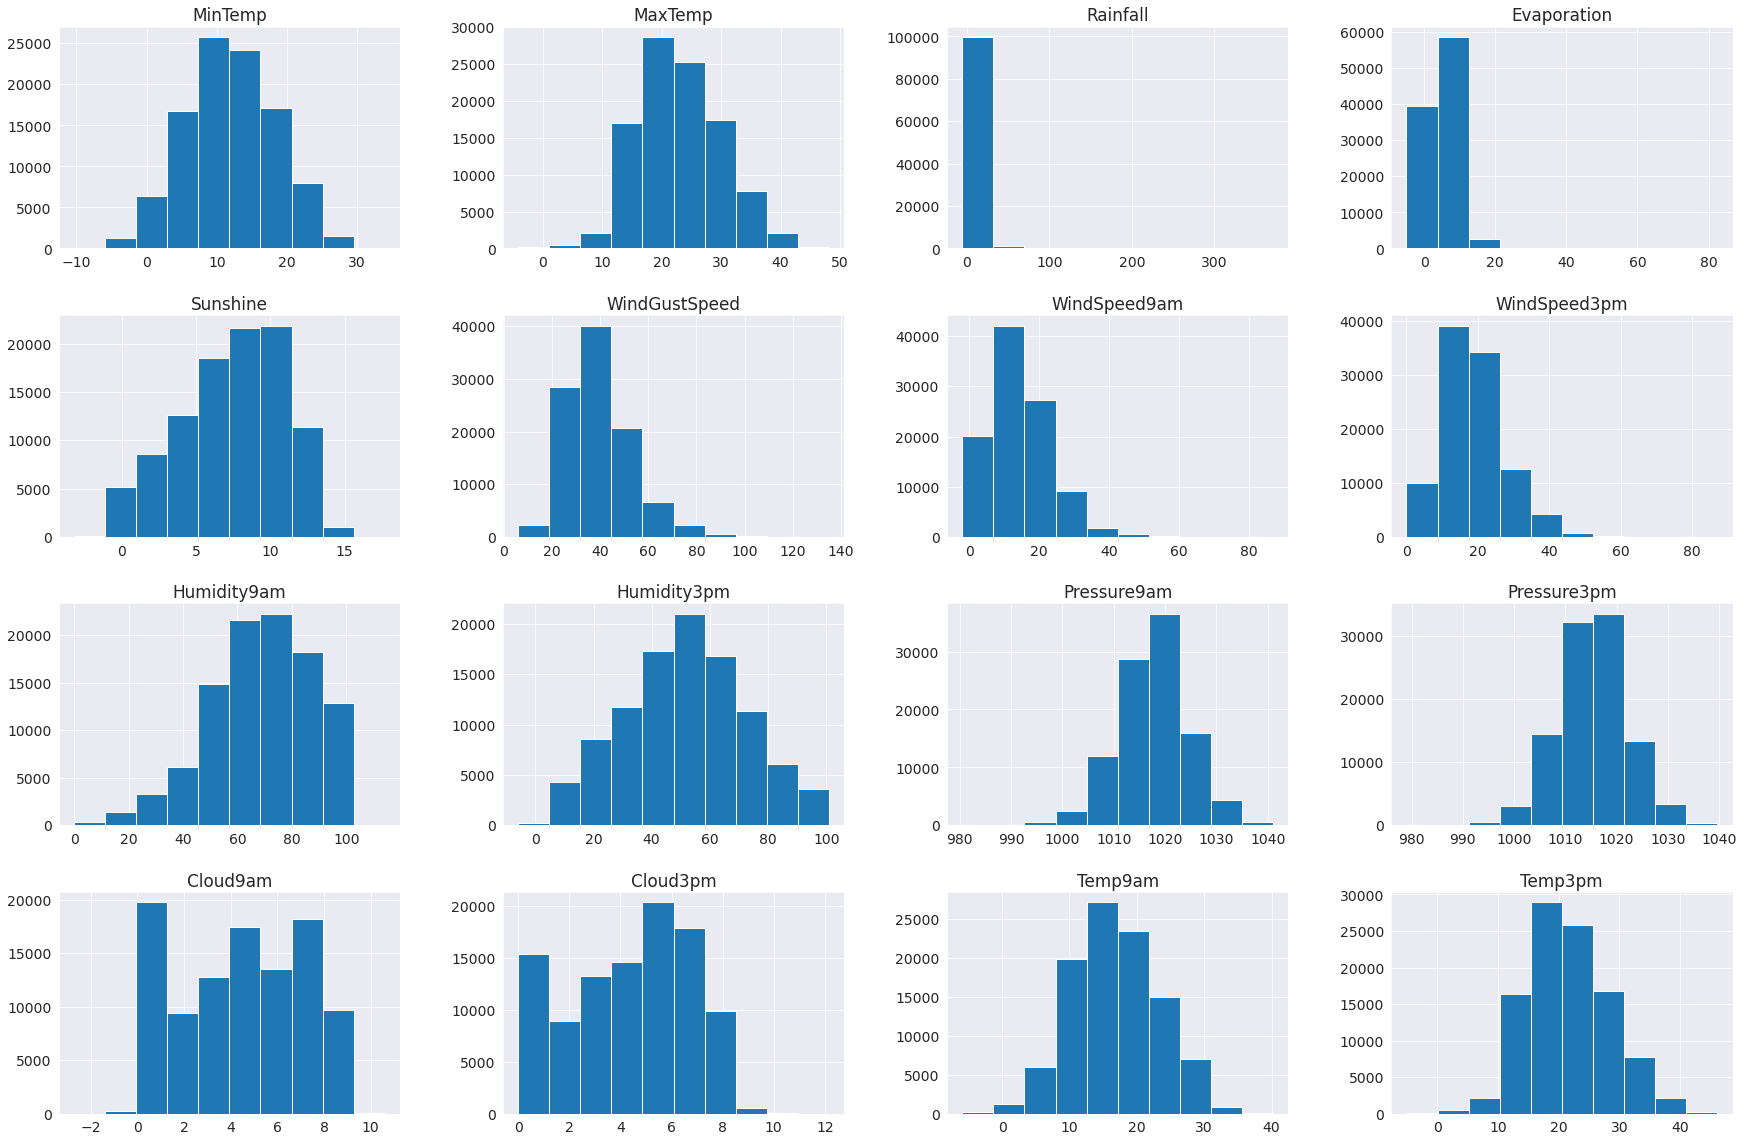

In [19]:
train_inputs[numeric_cols].hist(figsize=(30,20));

In [20]:
A = train_inputs[numeric_cols]

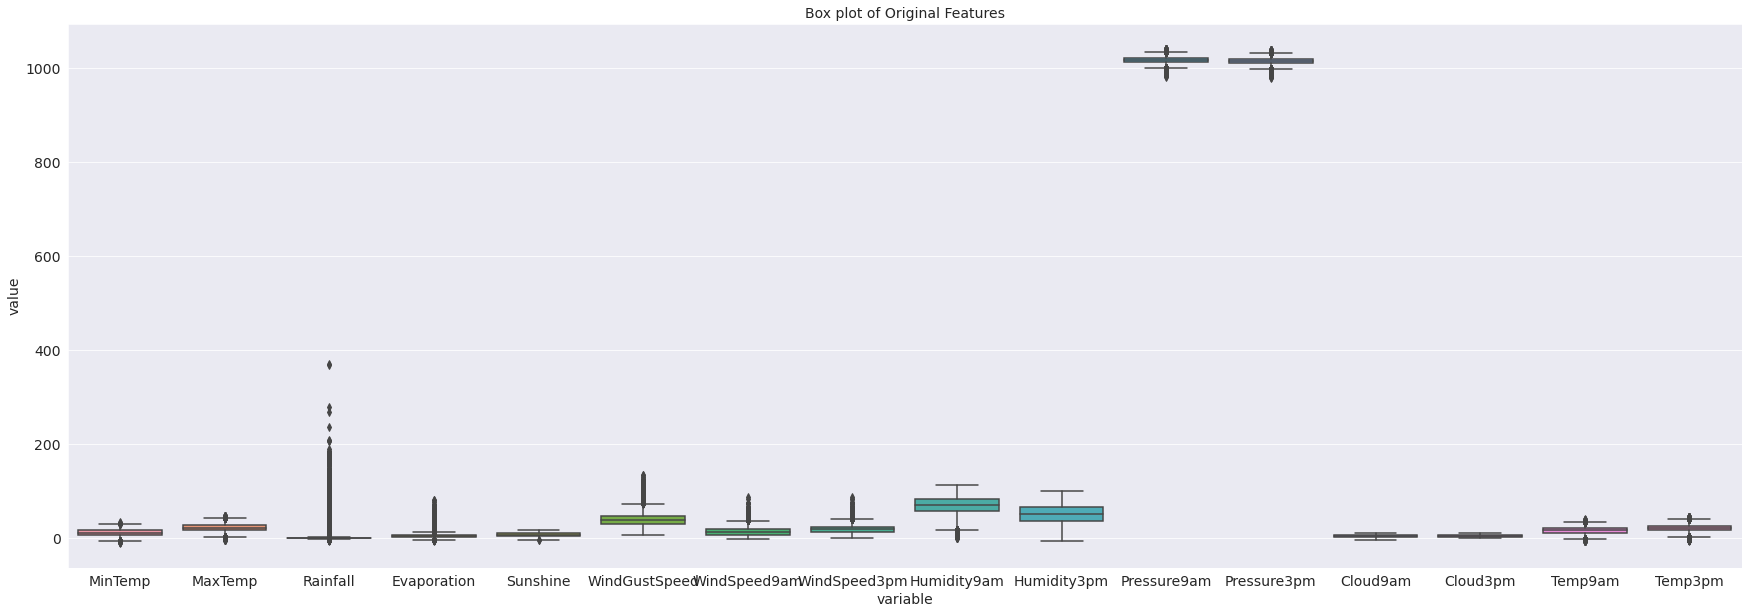

In [21]:
plt.figure(figsize=(30,10))
sns.boxplot(x='variable',y='value',data = A.melt()).set_title('Box plot of Original Features',size =14);

It can be seen that the data have varied ranges for different columns.

# MinMax Scaler
MinMax Scaler is one of the simplest scaler it converts the values into the range of 0 to 1. The formula used for this is :
$x(scaled) = [x – x(min)]/[x(max) – x(min)]$

0,1 is the defined range of this scaler but we can change this as per our preferrence.

Let's see how to use the MinMax Scaler to scale the features in our `train_inputs` 

In [22]:
# importing minmax scaler 
from sklearn.preprocessing import MinMaxScaler
# model creation 
mm_scaler = MinMaxScaler()
# fitting and transforming the model on A(train_inputs)
A_mm = pd.DataFrame(mm_scaler.fit_transform(A),columns = numeric_cols)

In [23]:
A_mm.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000
mean,0.504581,0.518810,0.021188,0.114222,0.509030,0.263414,0.181550,0.215827,0.602780,0.538300,0.613371,0.597808,0.529958,0.367478,0.491820,0.519086
std,0.143066,0.133788,0.022420,0.040946,0.167826,0.105434,0.100635,0.101540,0.166030,0.194079,0.111958,0.110637,0.191358,0.195250,0.139116,0.133867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.403018,0.419540,0.014837,0.086959,0.392905,0.193798,0.101548,0.149425,0.499513,0.401734,0.542149,0.526403,0.354076,0.214438,0.392625,0.421875
50%,0.500254,0.507663,0.014837,0.109217,0.526856,0.255814,0.168932,0.218391,0.613437,0.542231,0.616529,0.599673,0.548623,0.383389,0.485900,0.507812
75%,0.608796,0.611111,0.016961,0.134317,0.641672,0.325581,0.236316,0.275862,0.727361,0.673362,0.684298,0.668317,0.729703,0.567011,0.590022,0.609375
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


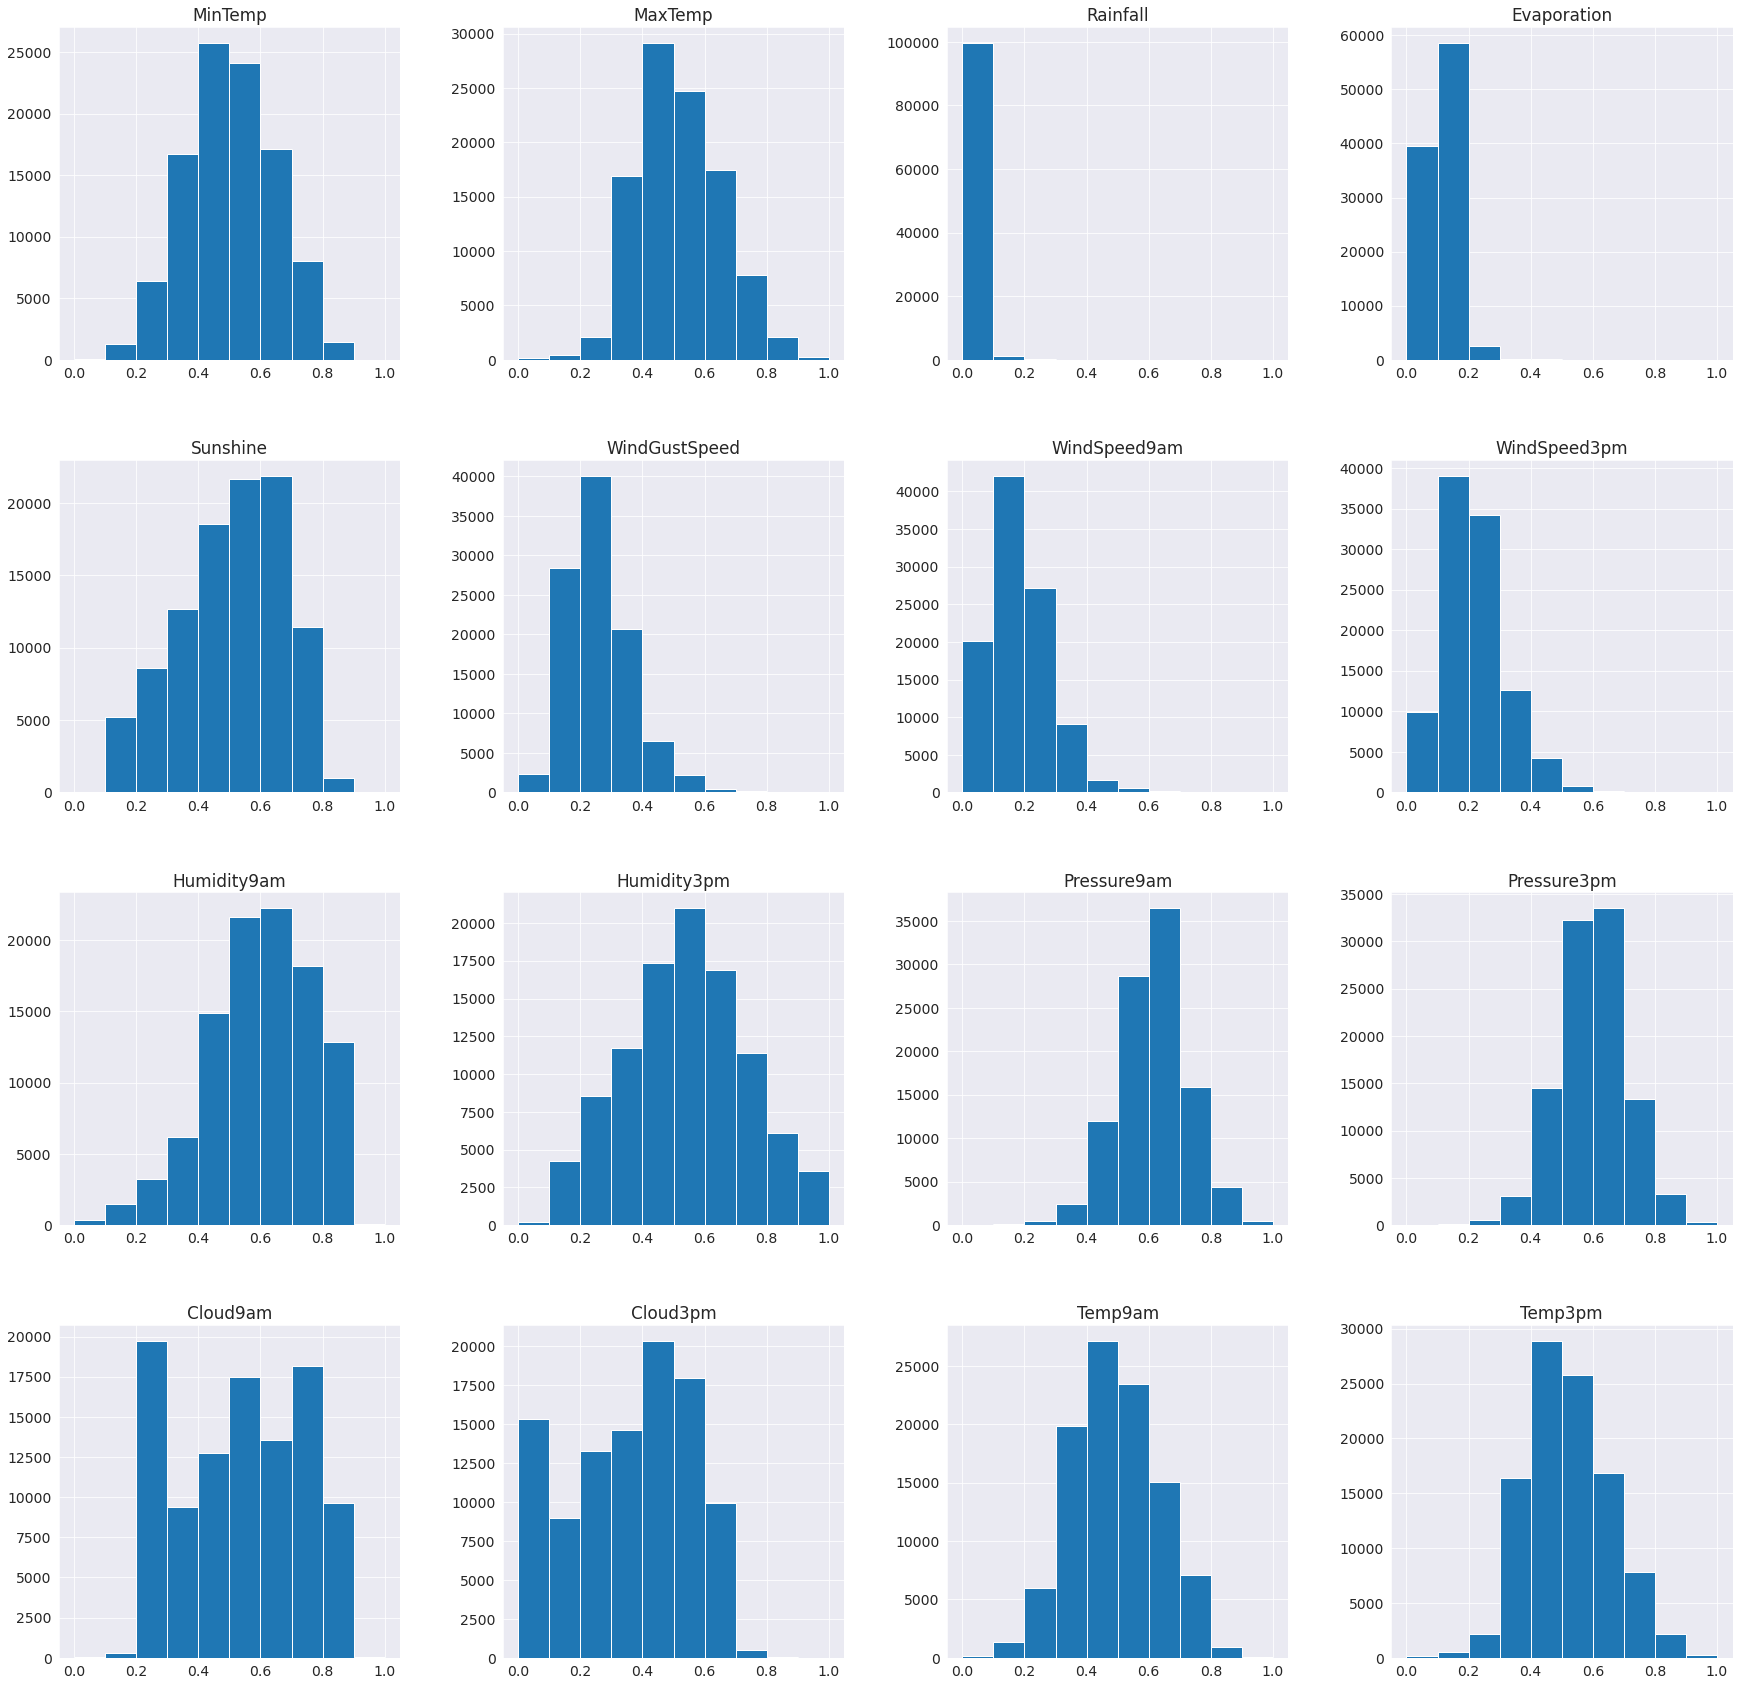

In [24]:
A_mm[numeric_cols].hist(figsize=(30,30));

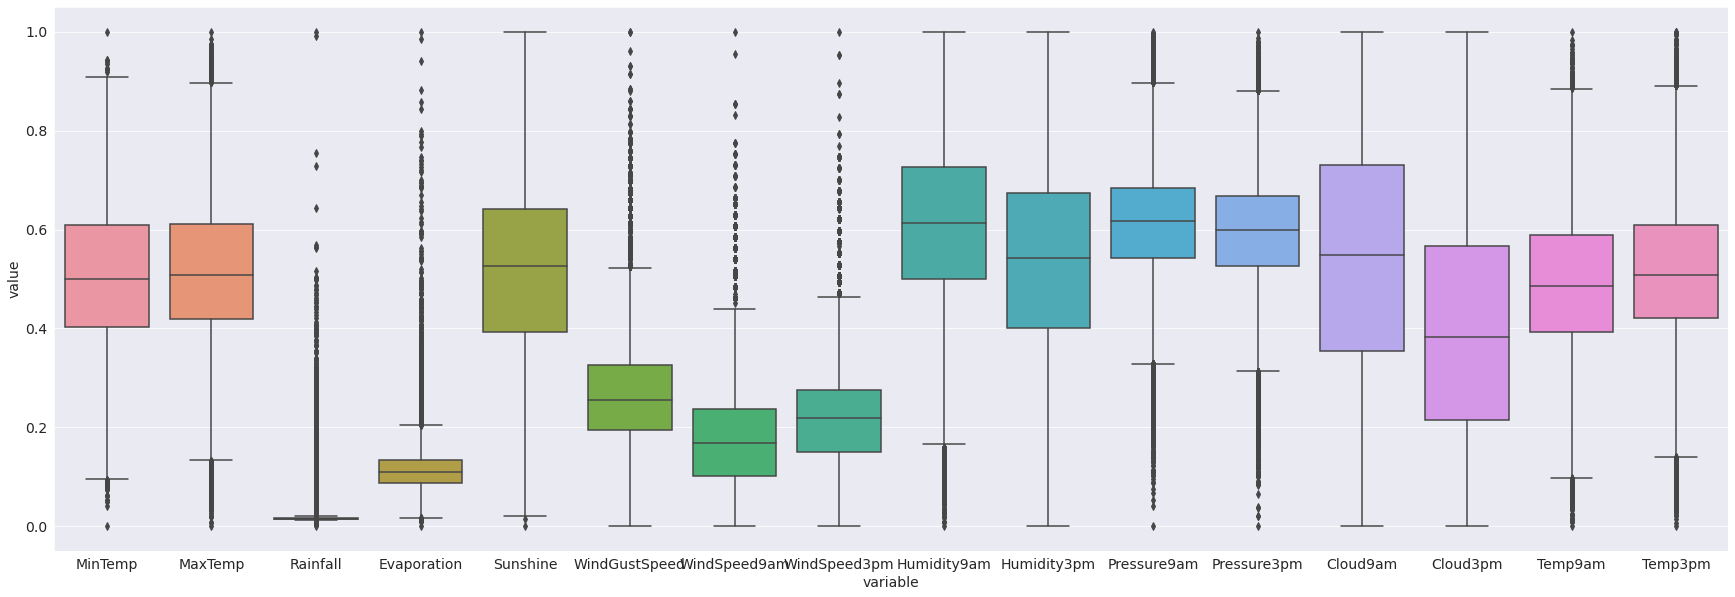

In [25]:
plt.figure(figsize=(30,10))
sns.boxplot(x='variable',y='value', data=A_mm.melt());

With the help of histograms and boxplots, it is pretty clear that the values are now converted into the range of 0 to 1 using the the MinMax Scaler.

# Standard Scaler
Standard Scaler is also one of the popular scaler used. It scales the values such that the mean is close to 0 and standard deviation (or variance) is close to 1. It assumes that the data is normally distributed the formula used by Standard Scaler is 

$x(scaled) = x- mean/StdDev$

In [26]:
# importing Standard Scaler
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

A_s = pd.DataFrame(s_scaler.fit_transform(A),columns = numeric_cols)

In [27]:
A_s.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05
mean,5.671350e-16,-1.819518e-15,7.353781e-15,1.587147e-15,2.773592e-15,3.471987e-15,1.787828e-14,7.965090e-16,3.219345e-14,5.786920e-15,2.326419e-14,1.176632e-14,3.632128e-15,-3.659687e-16,-6.954429e-16,-2.842412e-15
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-3.526918e+00,-3.877876e+00,-9.450737e-01,-2.789631e+00,-3.033101e+00,-2.498377e+00,-1.804054e+00,-2.125545e+00,-3.630564e+00,-2.773626e+00,-5.478619e+00,-5.403369e+00,-2.769479e+00,-1.882103e+00,-3.535336e+00,-3.877655e+00
25%,-7.099023e-01,-7.419983e-01,-2.832841e-01,-6.658548e-01,-6.919425e-01,-6.602738e-01,-7.949725e-01,-6.539483e-01,-6.219773e-01,-7.036684e-01,-6.361526e-01,-6.454089e-01,-9.191329e-01,-7.838224e-01,-7.130410e-01,-7.261792e-01
50%,-3.024522e-02,-8.332084e-02,-2.832841e-01,-1.222565e-01,1.062209e-01,-7.208077e-02,-1.253826e-01,2.525017e-02,6.419158e-02,2.025373e-02,2.821026e-02,1.685612e-02,9.753883e-02,8.149120e-02,-4.255103e-02,-8.421196e-02
75%,7.284418e-01,6.899092e-01,-1.885305e-01,4.907629e-01,7.903610e-01,5.896364e-01,5.442073e-01,5.912489e-01,7.503605e-01,6.959144e-01,6.335186e-01,6.373012e-01,1.043838e+00,1.021942e+00,7.059029e-01,6.744766e-01
max,3.462876e+00,3.596681e+00,4.365872e+01,2.163316e+01,2.925492e+00,6.986236e+00,8.132893e+00,7.722833e+00,2.392472e+00,2.378936e+00,3.453370e+00,3.635263e+00,2.456367e+00,3.239571e+00,3.652940e+00,3.592510e+00


It can be seen that the Standard Scaler has converted the Std for each variable very close to 1.

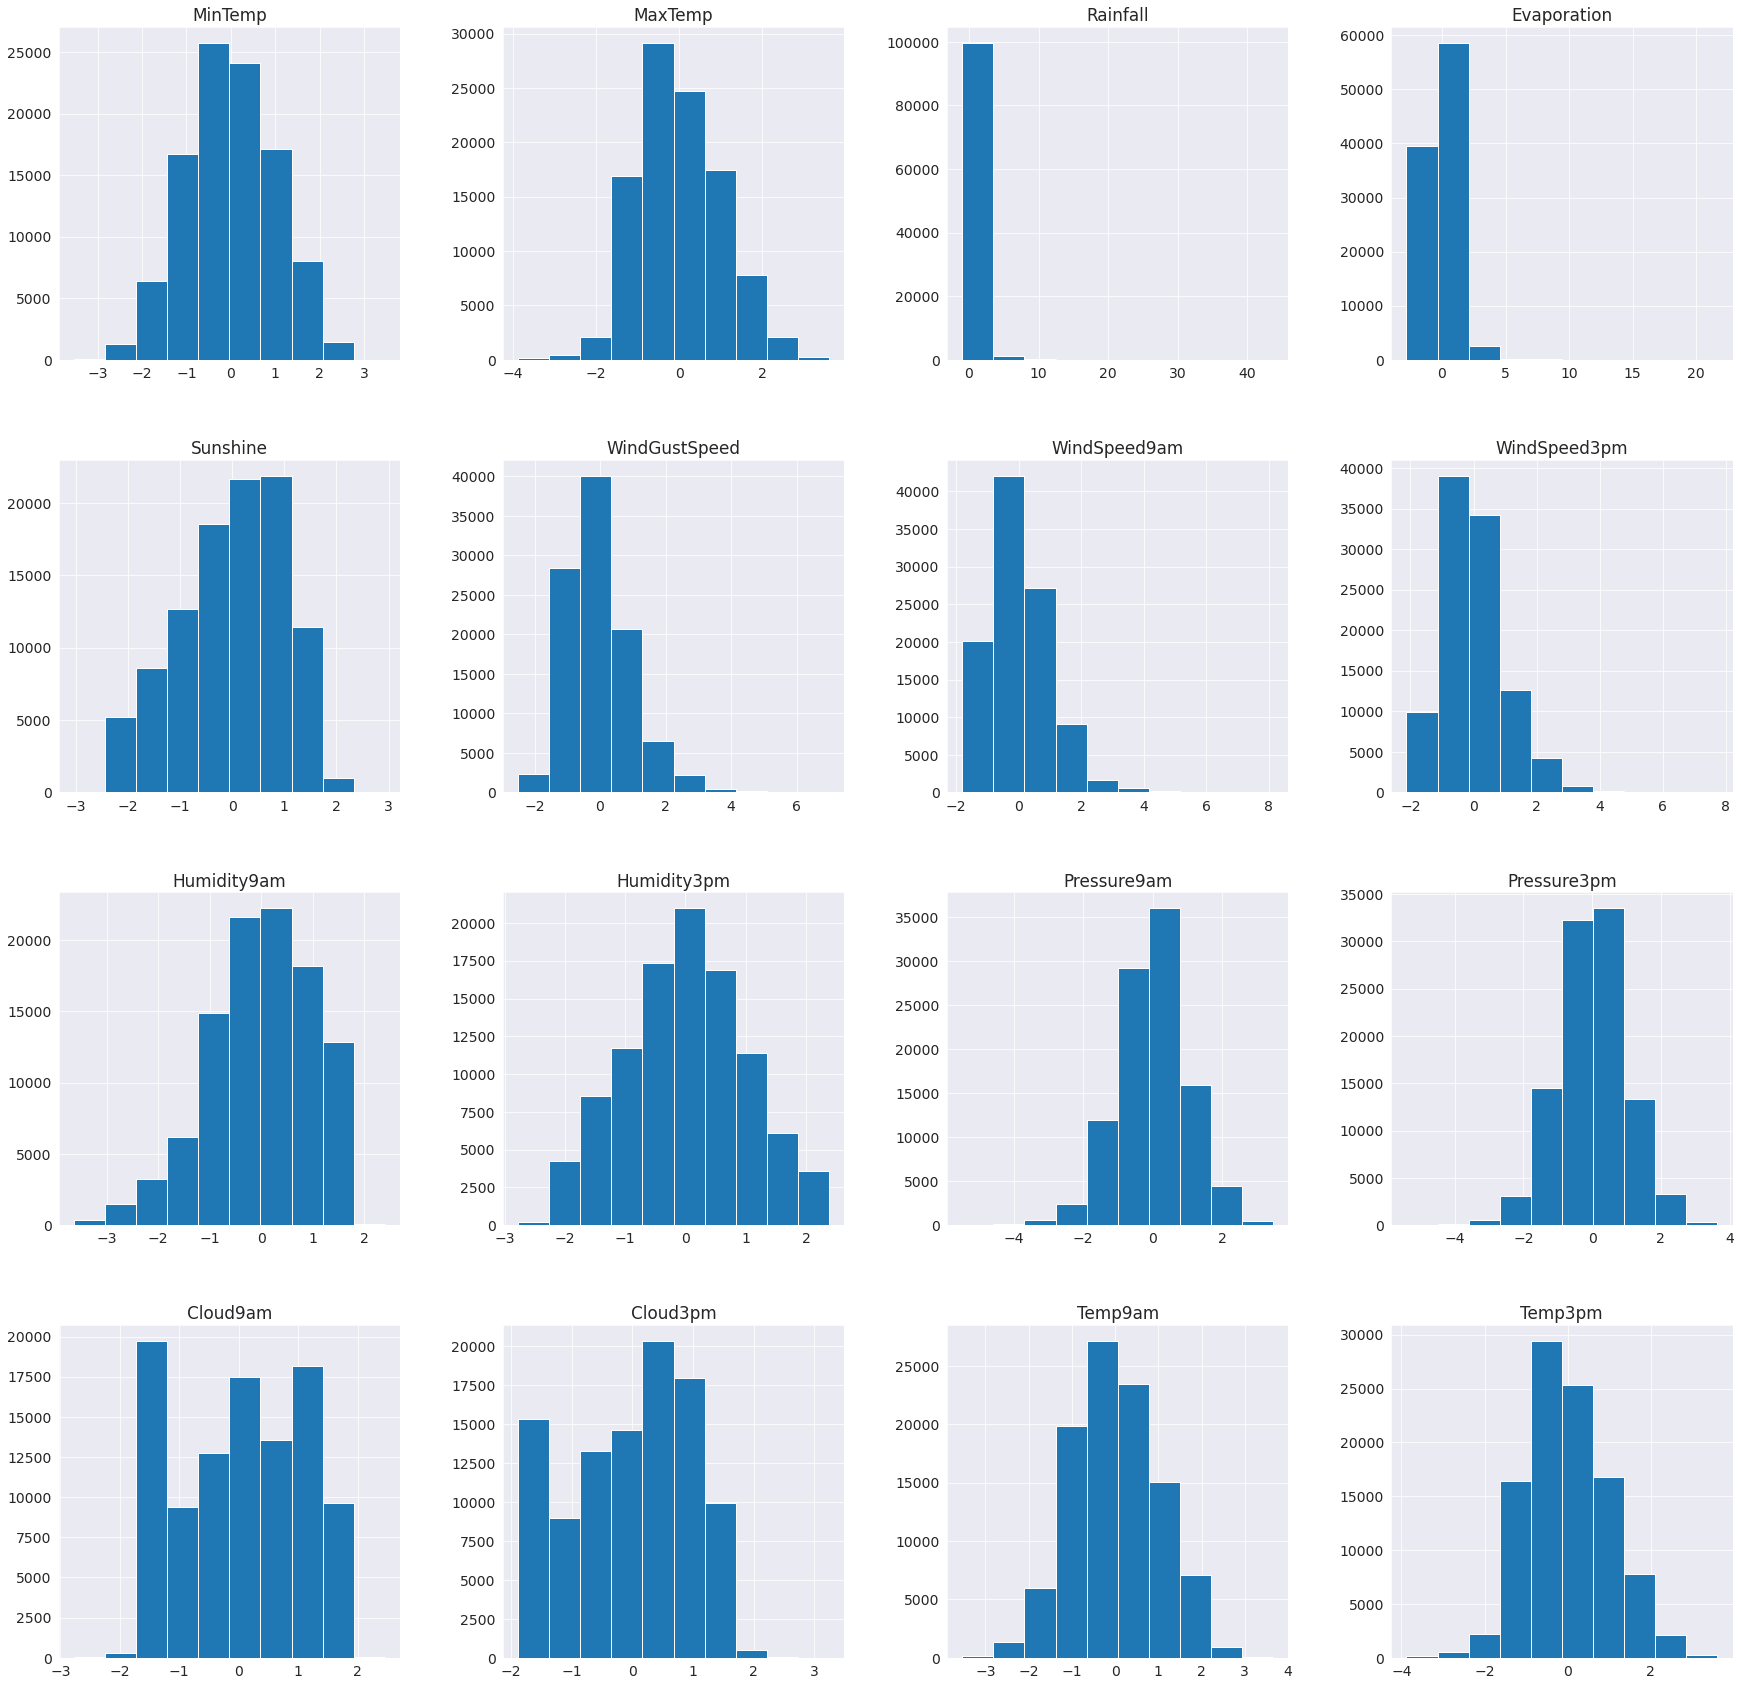

In [28]:
A_s[numeric_cols].hist(figsize=(30,30));

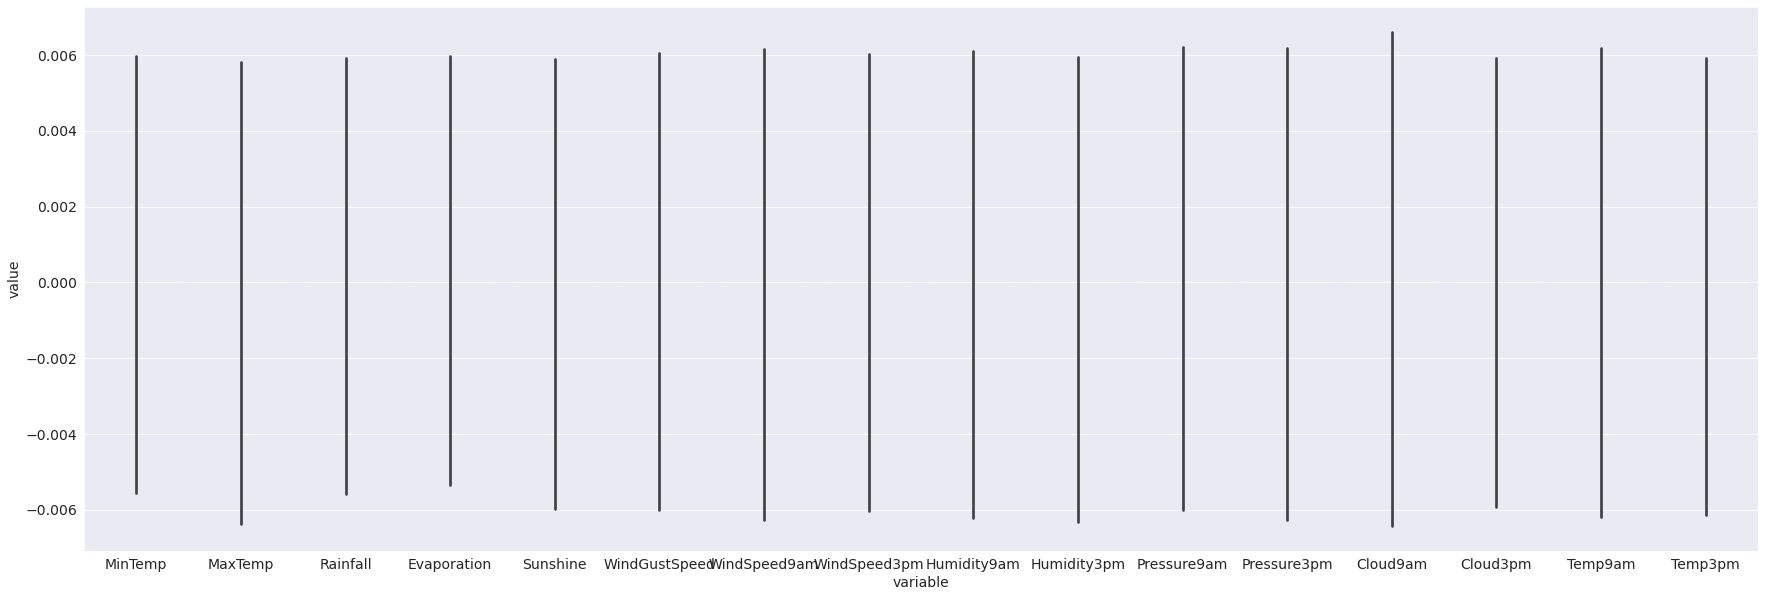

In [29]:
plt.figure(figsize=(30,10))
sns.barplot(x='variable',y='value',data=A_s.melt());

# MaxAbs Scaler

This scaler is usually used when there are both positive and negative values in the columns that are to be scaled. MaxAbs Scaler simply takes the maximum absolute value from each columns and then divides each value with this maximum absolute value. 

These scaled values are in the range of -1 to 1.

In [30]:
# Importing MaxAbs Scaler from sklearn
from sklearn.preprocessing import MaxAbsScaler
# Modelling the scaler
ab_scaler = MaxAbsScaler()
# fitting and transforming the model on A(train_inputs)
A_ab = pd.DataFrame(ab_scaler.fit_transform(A),columns = numeric_cols)

In [31]:
A_ab.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000
mean,0.353727,0.477794,0.006447,0.060471,0.419859,0.296151,0.162339,0.215827,0.602780,0.511339,0.977530,0.976556,0.409625,0.367478,0.417236,0.465882
std,0.186630,0.145192,0.022757,0.043430,0.198306,0.100748,0.102997,0.101540,0.166030,0.205412,0.006507,0.006449,0.240346,0.195250,0.159534,0.148676
min,-0.304498,-0.085239,-0.015061,-0.060682,-0.181621,0.044444,-0.023472,0.000000,0.000000,-0.058395,0.941883,0.941708,-0.256005,0.000000,-0.146766,-0.110629
25%,0.221239,0.370062,0.000000,0.031553,0.282643,0.229630,0.080460,0.149425,0.499513,0.366798,0.973391,0.972393,0.188716,0.214438,0.303483,0.357918
50%,0.348083,0.465696,0.000000,0.055162,0.440923,0.288889,0.149425,0.218391,0.613437,0.515500,0.977714,0.976664,0.433068,0.383389,0.410448,0.453362
75%,0.489676,0.577963,0.002156,0.081785,0.576592,0.355556,0.218391,0.275862,0.727361,0.654288,0.981652,0.980666,0.660506,0.567011,0.529851,0.566161
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


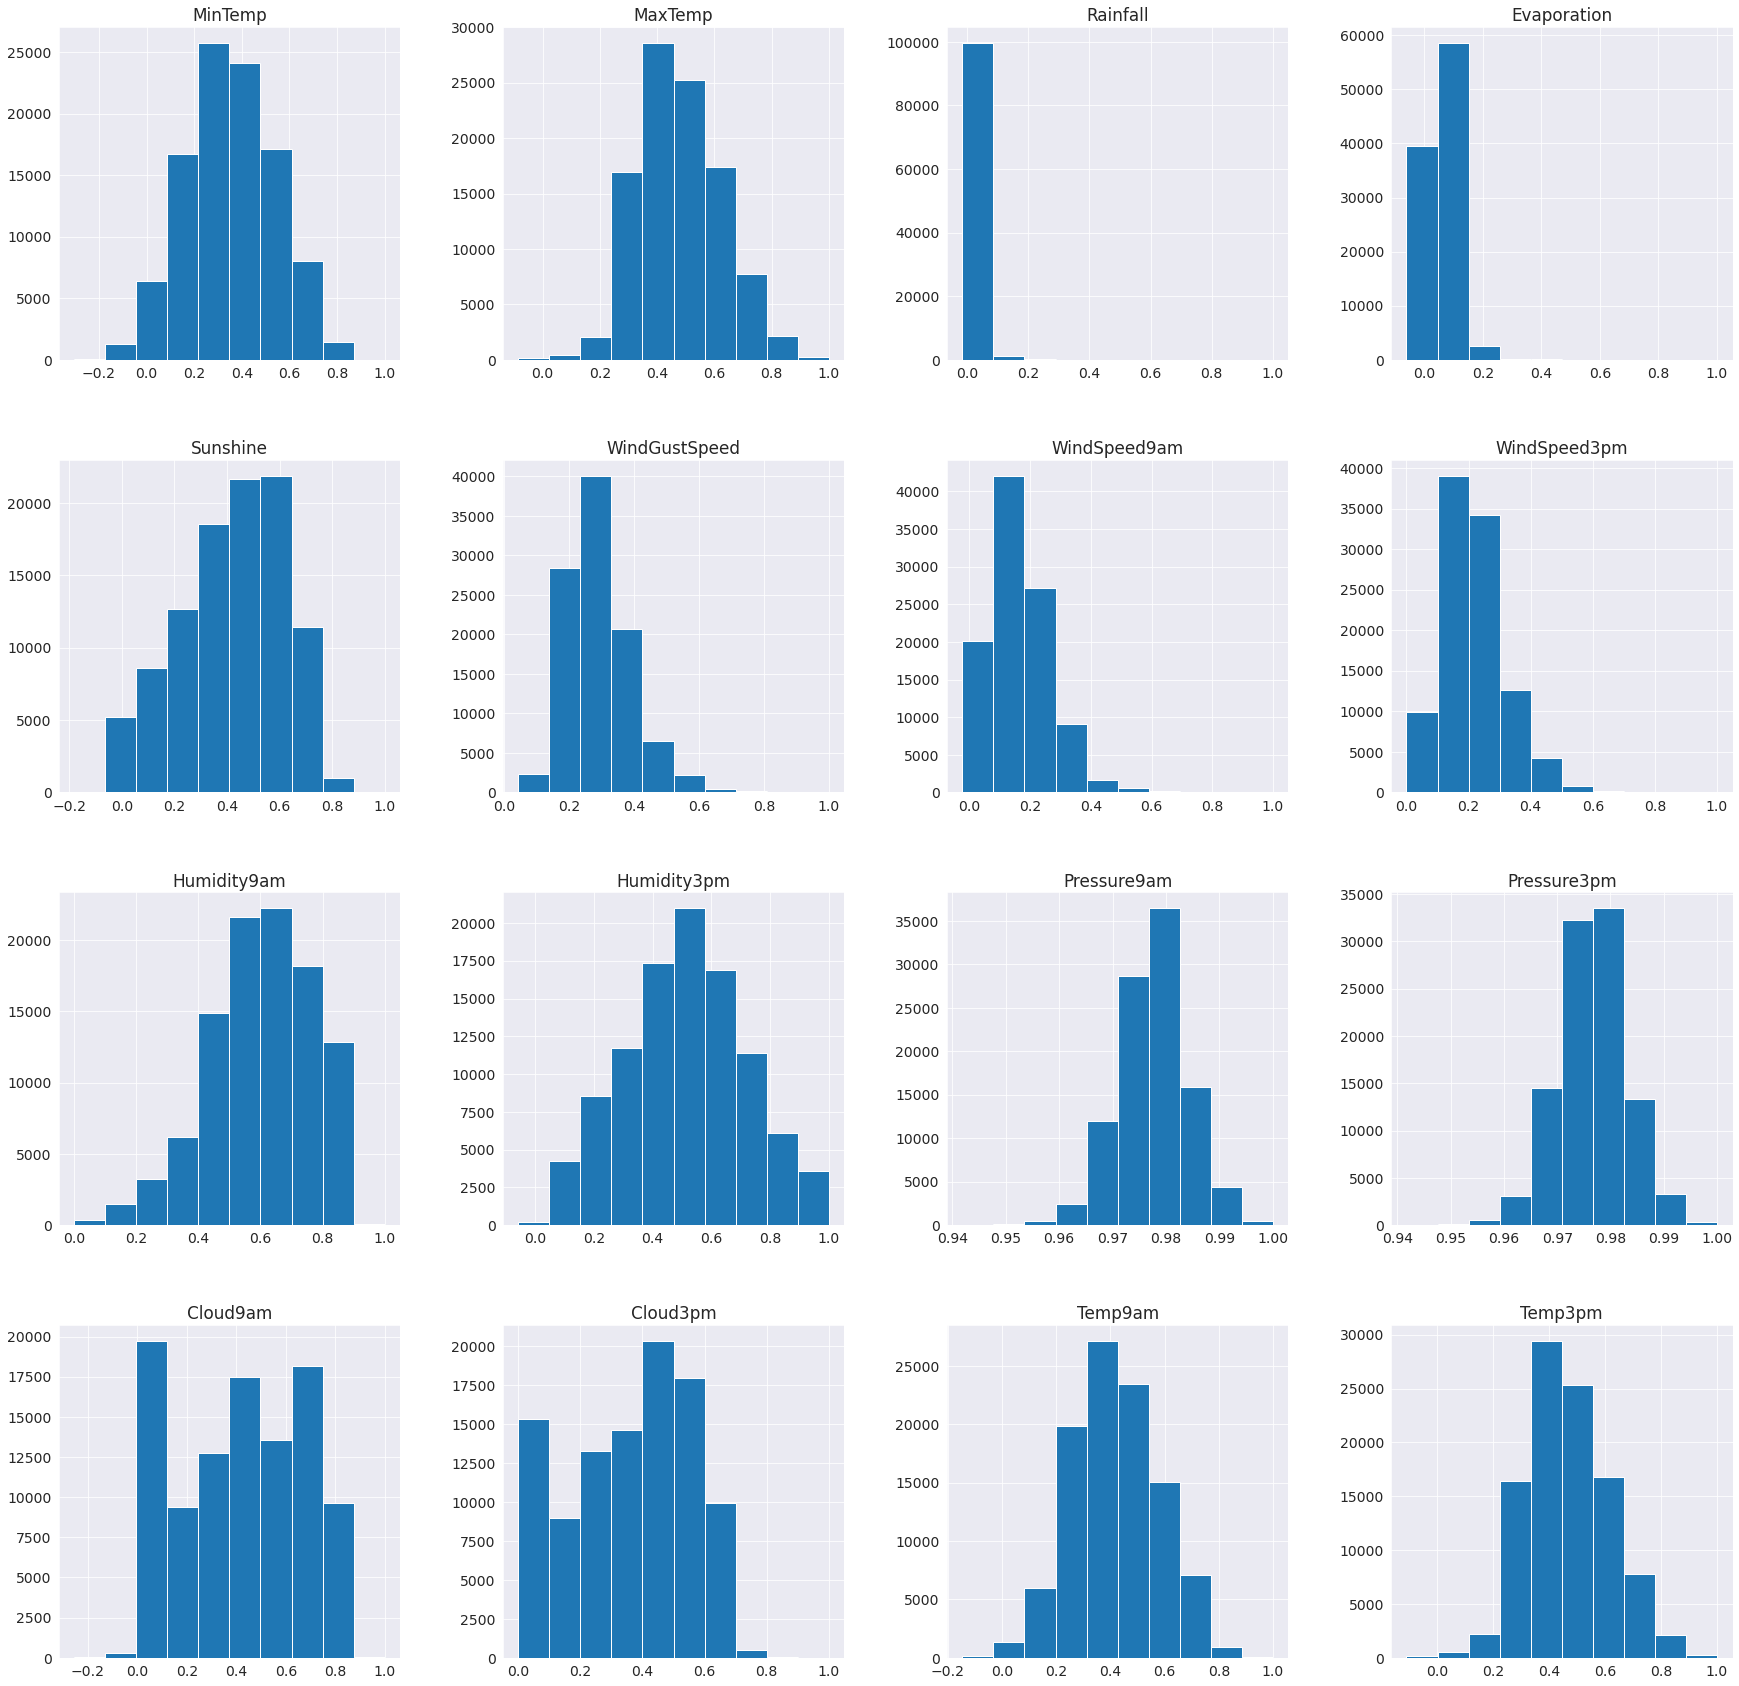

In [32]:
A_ab[numeric_cols].hist(figsize=(30,30));

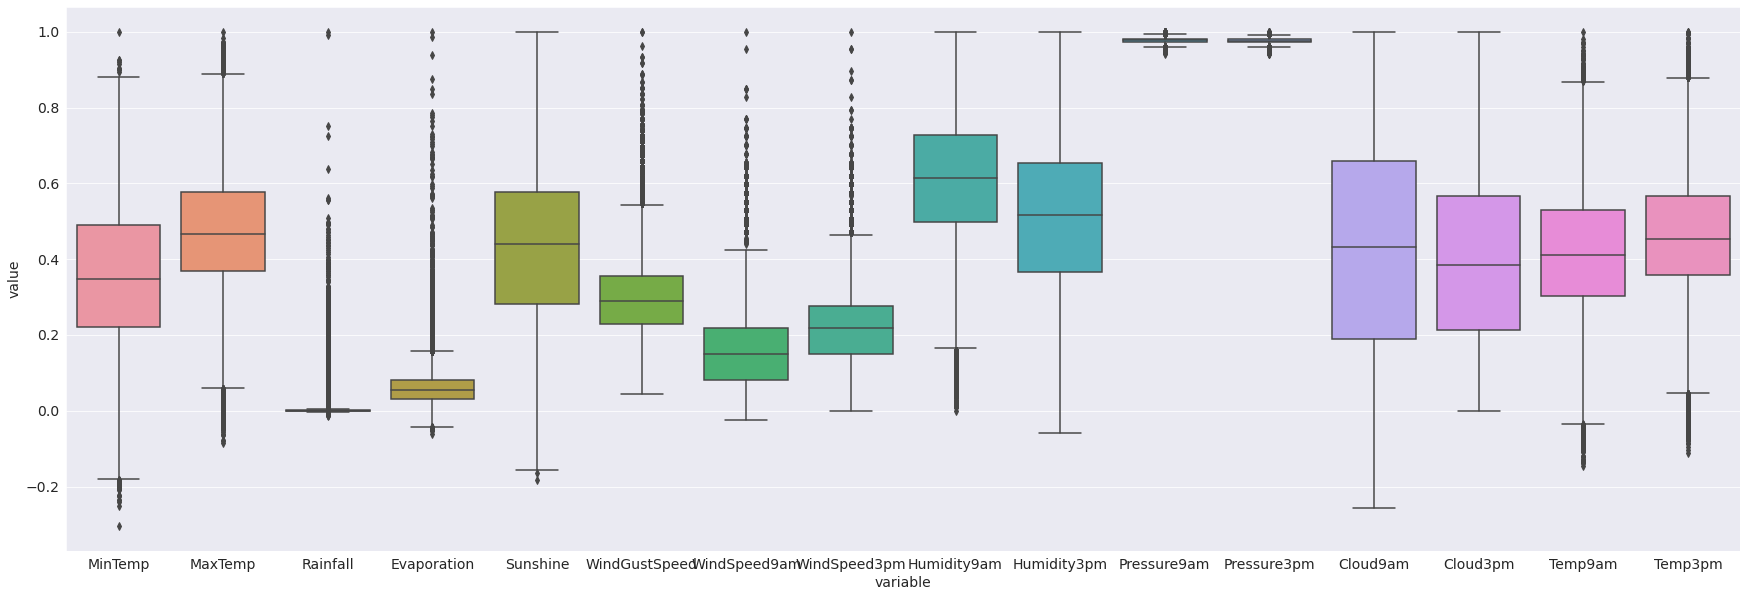

In [33]:
plt.figure(figsize=(30,10))
sns.boxplot(x='variable',y='value',data=A_ab.melt());

It can be seen that the scaled values are in the range of -1 to 1.

# Robust Scaler

All the above explained scalers uses mean, maximum value or minimum values. These values are pretty sensitive to outliers. The robust scaler uses interquartile range which is not sensitive to outliers. The formula for scaling using this scaler is 

$ x(scaled) = (x-Q_1)/(Q_3-Q_1)$

In [34]:
# Importing Robust Scaler from sklearn.preprocessing
from sklearn.preprocessing import RobustScaler
# Model Creation
r_scaler = RobustScaler()
# fitting and transforming the model on A(train_inputs)
A_r = pd.DataFrame(r_scaler.fit_transform(A),columns = numeric_cols)

In [35]:
A_r.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,101018.000000,101018.000000,101018.000000,1.010180e+05,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,1.010180e+05,101018.000000,101018.000000,101018.000000,101018.000000
mean,0.021028,0.058189,2.989691,1.057017e-01,-0.071659,0.057669,0.093626,-0.020278,-0.046775,-0.014471,-0.022219,-1.314102e-02,-0.049689,-0.045128,0.029988,0.060123
std,0.695247,0.698373,10.553737,8.645942e-01,0.674629,0.800061,0.746729,0.803090,0.728687,0.714502,0.787609,7.796032e-01,0.509434,0.553785,0.704753,0.713955
min,-2.431040,-2.650000,-6.984318,-2.306186e+00,-2.117867,-1.941176,-1.253507,-1.727273,-2.692308,-1.996223,-4.337209,-4.225604e+00,-1.460550,-1.087403,-2.461538,-2.708333
25%,-0.472527,-0.460000,0.000000,-4.699896e-01,-0.538462,-0.470588,-0.500000,-0.545455,-0.500000,-0.517241,-0.523256,-5.163014e-01,-0.517925,-0.479195,-0.472527,-0.458333
50%,0.000000,0.000000,0.000000,1.072903e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.609703e-15,0.000000,0.000000,0.000000,0.000000
75%,0.527473,0.540000,1.000000,5.300104e-01,0.461538,0.529412,0.500000,0.454545,0.500000,0.482759,0.476744,4.836986e-01,0.482075,0.520805,0.527473,0.541667
max,2.428571,2.570000,463.750000,1.880951e+01,1.901953,5.647059,6.166667,6.181818,1.696580,1.685275,2.697674,2.820908e+00,1.201662,1.748888,2.604396,2.625000


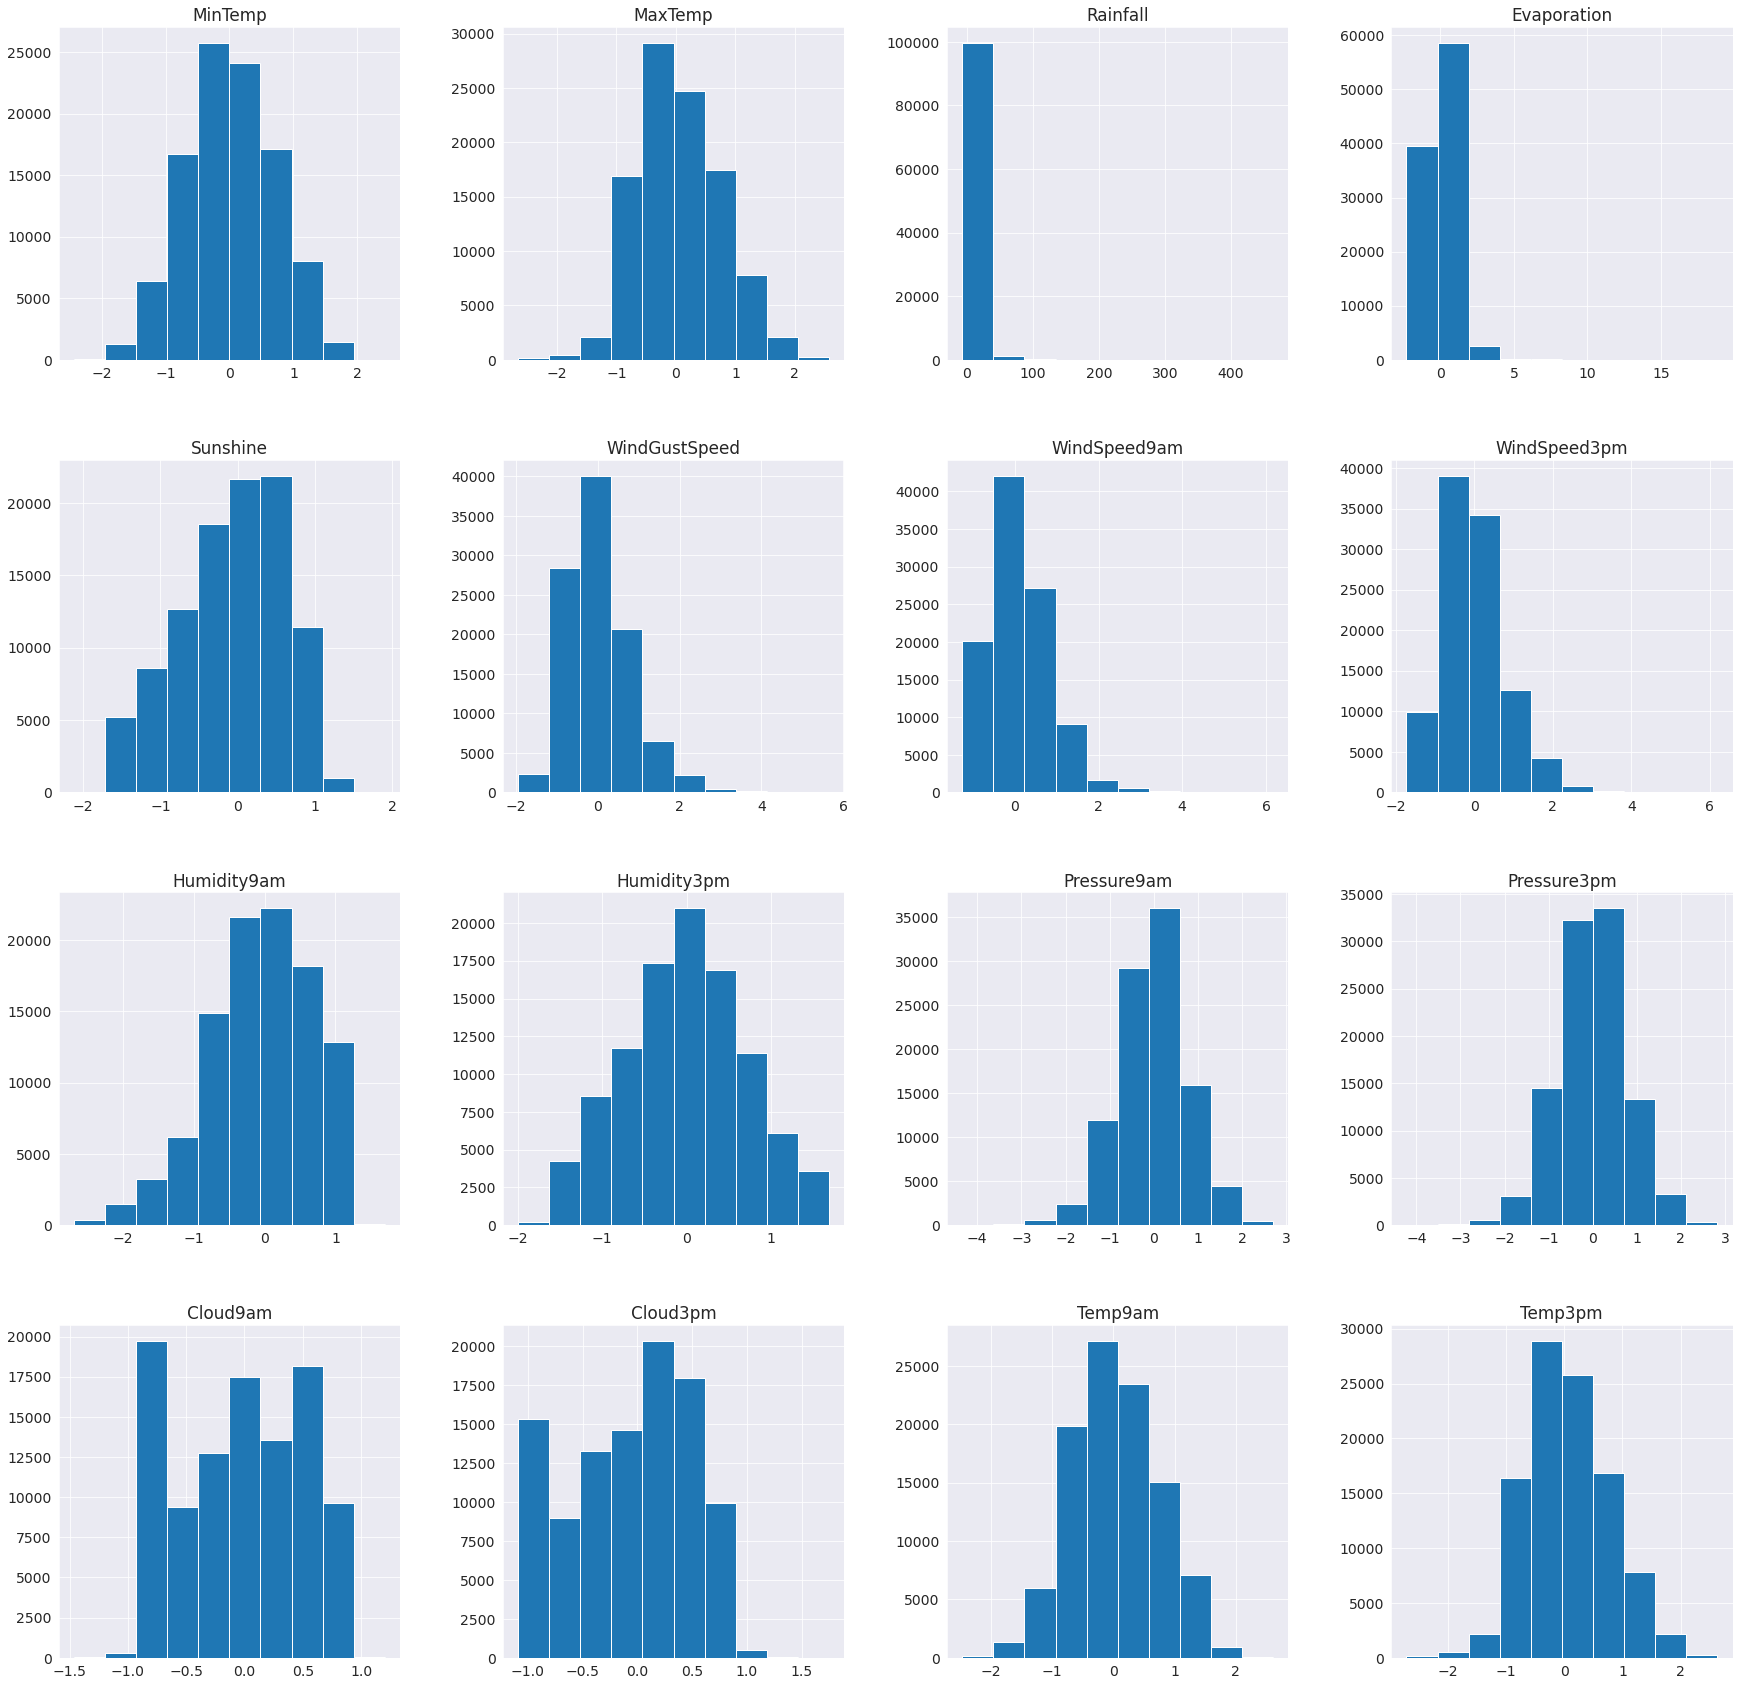

In [36]:
A_r[numeric_cols].hist(figsize=(30,30));

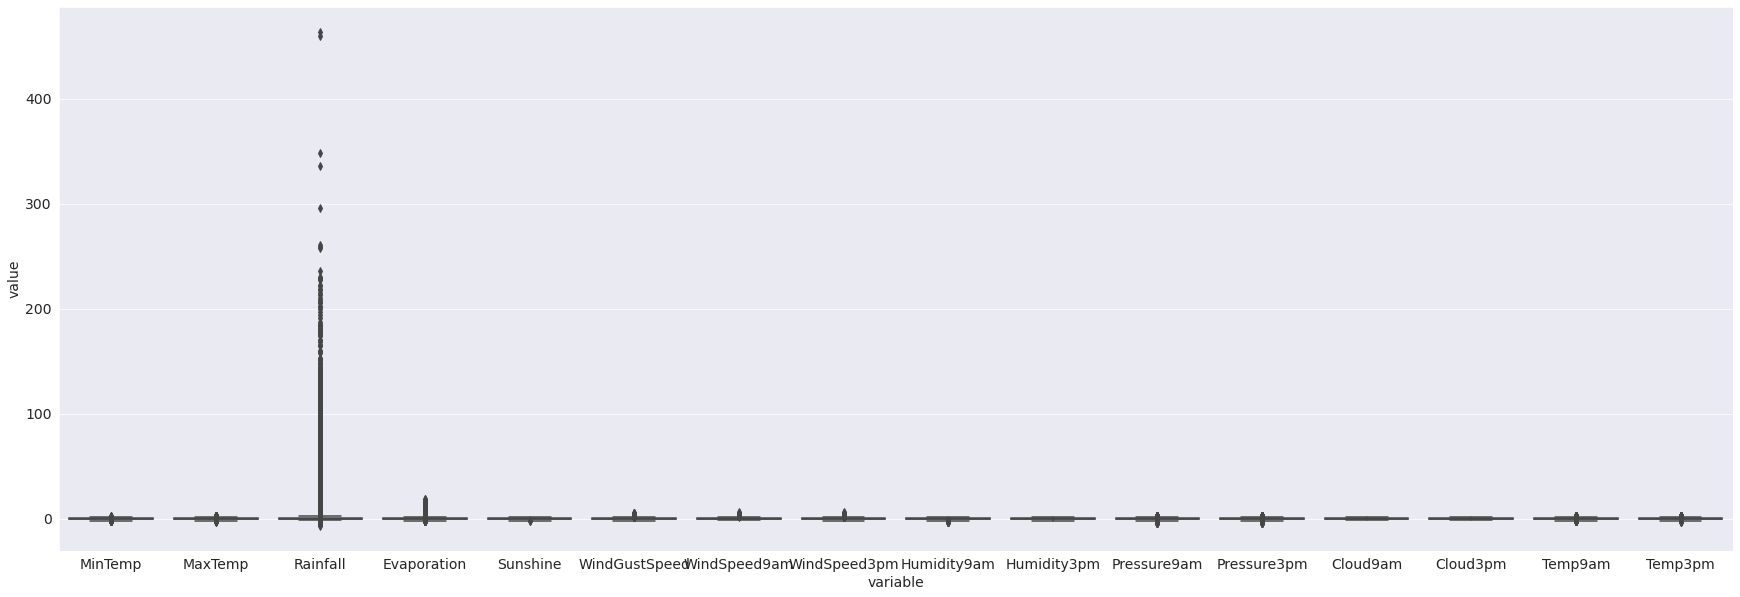

In [37]:
plt.figure(figsize=(30,10))
sns.boxplot(x='variable',y='value',data=A_r.melt());

It can be seen in the histograms that the scaled values are now more normally distributed than in any other scaling process.

# Quantile Transform Scaler

Quantile Transformer Scaler takes the variable distribution and converts it to a normal distribution for the scaling process. As this scaler converts the values into normal distribution it is very much effective in dealing with the outliers in the data. Below is the process used by Quantile Transformer Scaler to scale the data:

1. It computes the cumulative distribution function(cdf) of the variable

2. It uses this cdf to map the values to a normal distribution

3. Scales the values in a normally distributed output using the associated quantile function

In [38]:
# Importing Quantile Transformer Scaler from sklearn.preprocessing
from sklearn.preprocessing import QuantileTransformer
# Model Creation
q_scaler = QuantileTransformer()
# fitting and transforming the model on A(train_inputs)
A_q = pd.DataFrame(q_scaler.fit_transform(A),columns = numeric_cols)

In [39]:
A_q.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000
mean,0.500025,0.500028,0.500173,0.499874,0.500025,0.499979,0.499973,0.500008,0.500008,0.499918,0.499982,0.500128,0.499843,0.499228,0.500139,0.499850
std,0.288710,0.288597,0.250720,0.288582,0.288652,0.288421,0.288038,0.288088,0.288630,0.288602,0.288666,0.288679,0.287756,0.289233,0.288738,0.288606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249750,0.247748,0.316316,0.253754,0.251752,0.274274,0.235235,0.275275,0.250751,0.251251,0.247748,0.250751,0.242743,0.250145,0.251752,0.248248
50%,0.500000,0.500501,0.316316,0.499830,0.502002,0.524024,0.492492,0.529530,0.505506,0.500501,0.502503,0.499949,0.499666,0.499926,0.500000,0.500501
75%,0.751752,0.748248,0.744745,0.749761,0.751251,0.760761,0.721221,0.745245,0.751752,0.754755,0.751251,0.750250,0.809309,0.749790,0.751251,0.750250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


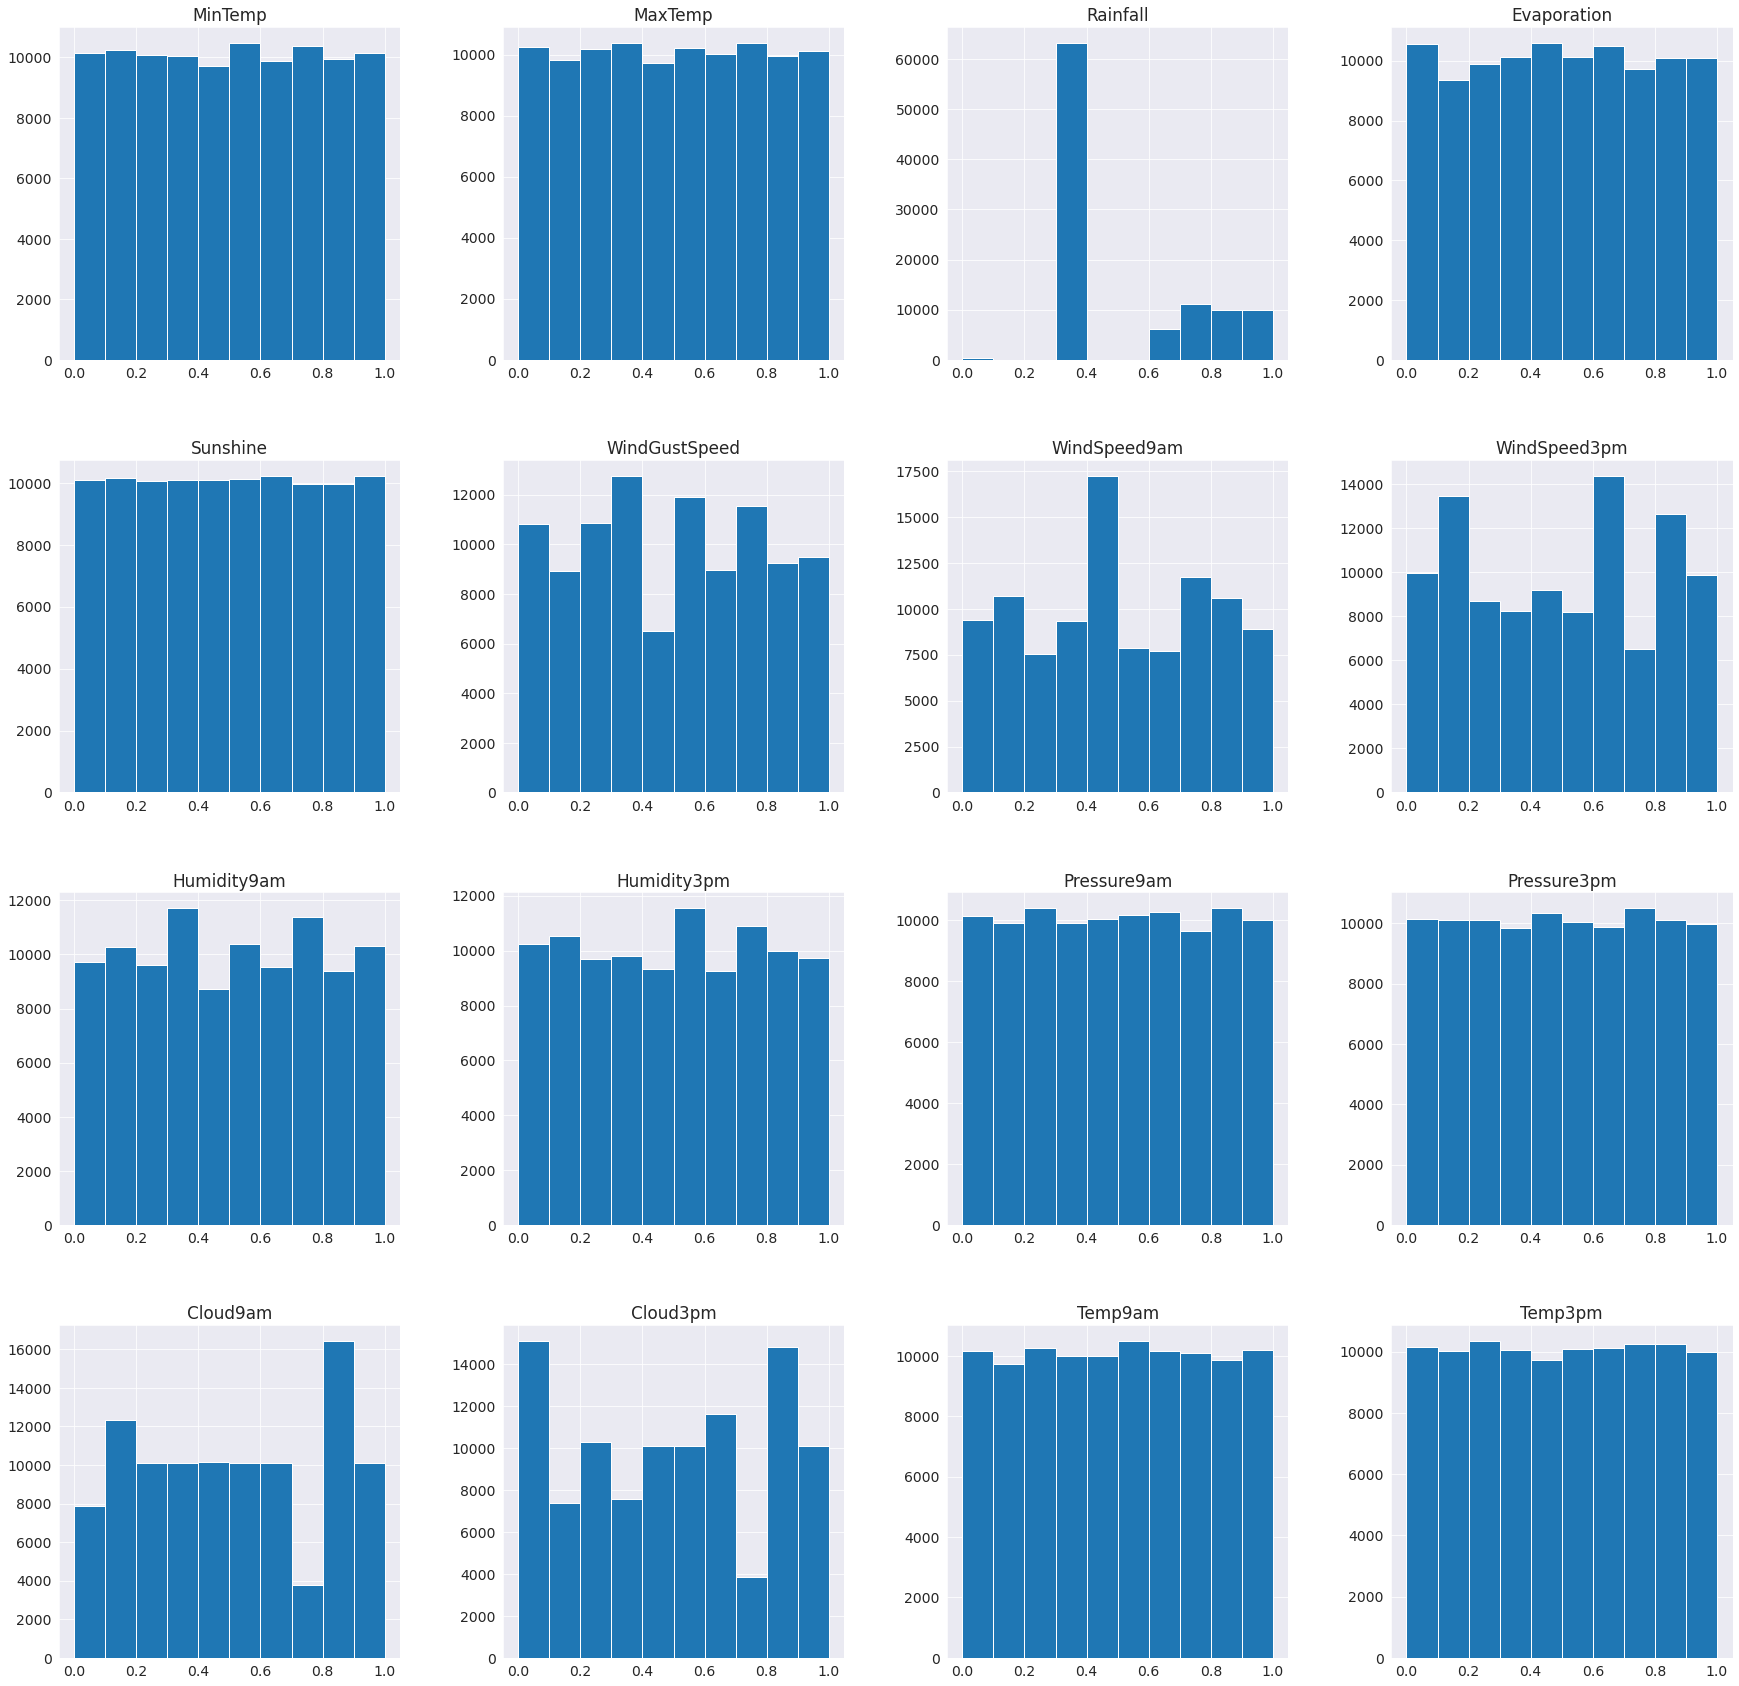

In [40]:
A_q[numeric_cols].hist(figsize=(30,30));

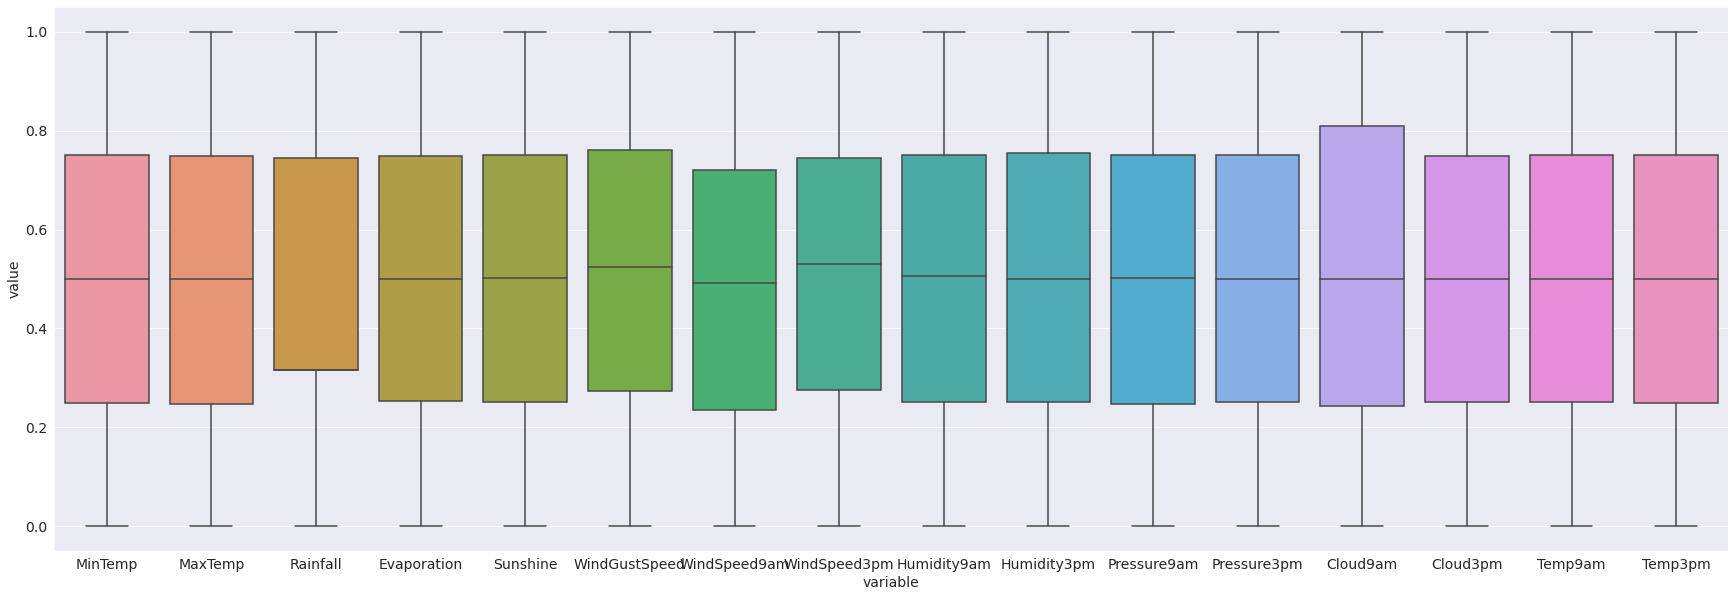

In [41]:
plt.figure(figsize=(30,10))
sns.boxplot(x='variable',y='value',data=A_q.melt());

The Quantile Transformer and Robust Transformer both are quite similar but Quantile Transformer scales the data in the range of 0 to 1.

**Note** Since this scaler changes the distribution of data, the linear relationships associated with these values are also altered, It is recommended to use this scaler for data with non-linear scaler.

# Power Transformer Scaler

Power Transformer Scaler is used to convert the feature-wise data into more Gaussian(Normal) like distribution. This transformer is very useful for heteroscedasticity (non-constant variance) data. It support 2 methods.
1. Box-Cox Transform
2. Yeo-Johnson transform

The Box-Cox Transform needs the data to be strictly positive whereas, the Yeo-Johnson transformation can deal both positive and negative values 

In [42]:
A.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000
mean,11.991353,22.981887,2.391753,4.982851,7.427371,39.980369,14.123517,18.776941,68.783841,51.580333,1017.608920,1015.227179,4.341178,4.465415,16.772889,21.477183
std,6.326751,6.983726,8.442989,3.578652,3.508071,13.601045,8.960753,8.833985,18.945866,20.720564,6.773441,6.704588,2.547172,2.372579,6.413252,6.853966
min,-10.322467,-4.100000,-5.587454,-5.000220,-3.212909,6.000000,-2.042082,0.000000,0.000000,-5.890475,980.500000,979.000000,-2.713125,0.000000,-5.900000,-5.100000
25%,7.500000,17.800000,0.000000,2.600000,5.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.300000,1010.900000,2.000000,2.605744,12.200000,16.500000
50%,11.800000,22.400000,0.000000,4.545339,7.800000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.800000,1015.340192,4.589624,4.658759,16.500000,20.900000
75%,16.600000,27.800000,0.800000,6.739111,10.200000,48.000000,19.000000,24.000000,83.000000,66.000000,1021.900000,1019.500000,7.000000,6.890041,21.300000,26.100000
max,33.900000,48.100000,371.000000,82.400000,17.690155,135.000000,87.000000,87.000000,114.111080,100.872976,1041.000000,1039.600000,10.597934,12.151514,40.200000,46.100000


As there are some negative values in our columns we'll use `method =‘yeo-johnson’` as a parameter in the Power Transformer

In [43]:
# Importing Power Transformer Scaler from sklearn.preprocessing
from sklearn.preprocessing import PowerTransformer
# Model Creation
p_scaler = PowerTransformer(method='yeo-johnson')
# fitting and transforming the model on A(train_inputs)
A_p = pd.DataFrame(p_scaler.fit_transform(A),columns = numeric_cols)

In [44]:
A_p.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05,1.010180e+05
mean,7.484825e-15,9.803901e-15,5.929051e-16,-1.313092e-15,3.327482e-16,-2.949256e-15,-8.560382e-15,1.072996e-14,3.249468e-15,-4.671004e-15,-2.943974e-15,6.351683e-15,9.744689e-15,-2.109261e-14,-1.633940e-15,-2.979440e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-3.988154e+00,-5.226649e+00,-5.674003e+01,-7.625185e+00,-2.695166e+00,-4.361260e+00,-2.987827e+00,-2.909369e+00,-2.647366e+00,-3.184450e+00,-4.887812e+00,-5.007765e+00,-3.117497e+00,-1.925015e+00,-4.011006e+00,-5.071992e+00
25%,-6.951657e-01,-7.253487e-01,-5.097130e-01,-6.328270e-01,-7.170924e-01,-6.061603e-01,-7.270884e-01,-5.958888e-01,-6.911987e-01,-6.863888e-01,-6.506114e-01,-6.546186e-01,-9.020559e-01,-7.728294e-01,-7.019989e-01,-7.104149e-01
50%,-1.412633e-02,-5.344613e-02,-5.097130e-01,6.648254e-03,8.241802e-02,5.509664e-02,1.340798e-02,1.140231e-01,-4.361564e-03,4.213037e-02,6.083963e-03,2.070744e-03,1.237363e-01,9.516975e-02,-2.757935e-02,-5.797722e-02
75%,7.312177e-01,7.030030e-01,2.820245e-01,6.118953e-01,7.905638e-01,6.844662e-01,6.275729e-01,6.447510e-01,7.465315e-01,7.027957e-01,6.214990e-01,6.290826e-01,1.033224e+00,1.017227e+00,7.105495e-01,6.861286e-01
max,3.340033e+00,3.337684e+00,2.983617e+00,1.014660e+01,3.096596e+00,4.299095e+00,5.104893e+00,5.494641e+00,2.774093e+00,2.292411e+00,3.714588e+00,3.824839e+00,2.340429e+00,3.136090e+00,3.518796e+00,3.366221e+00


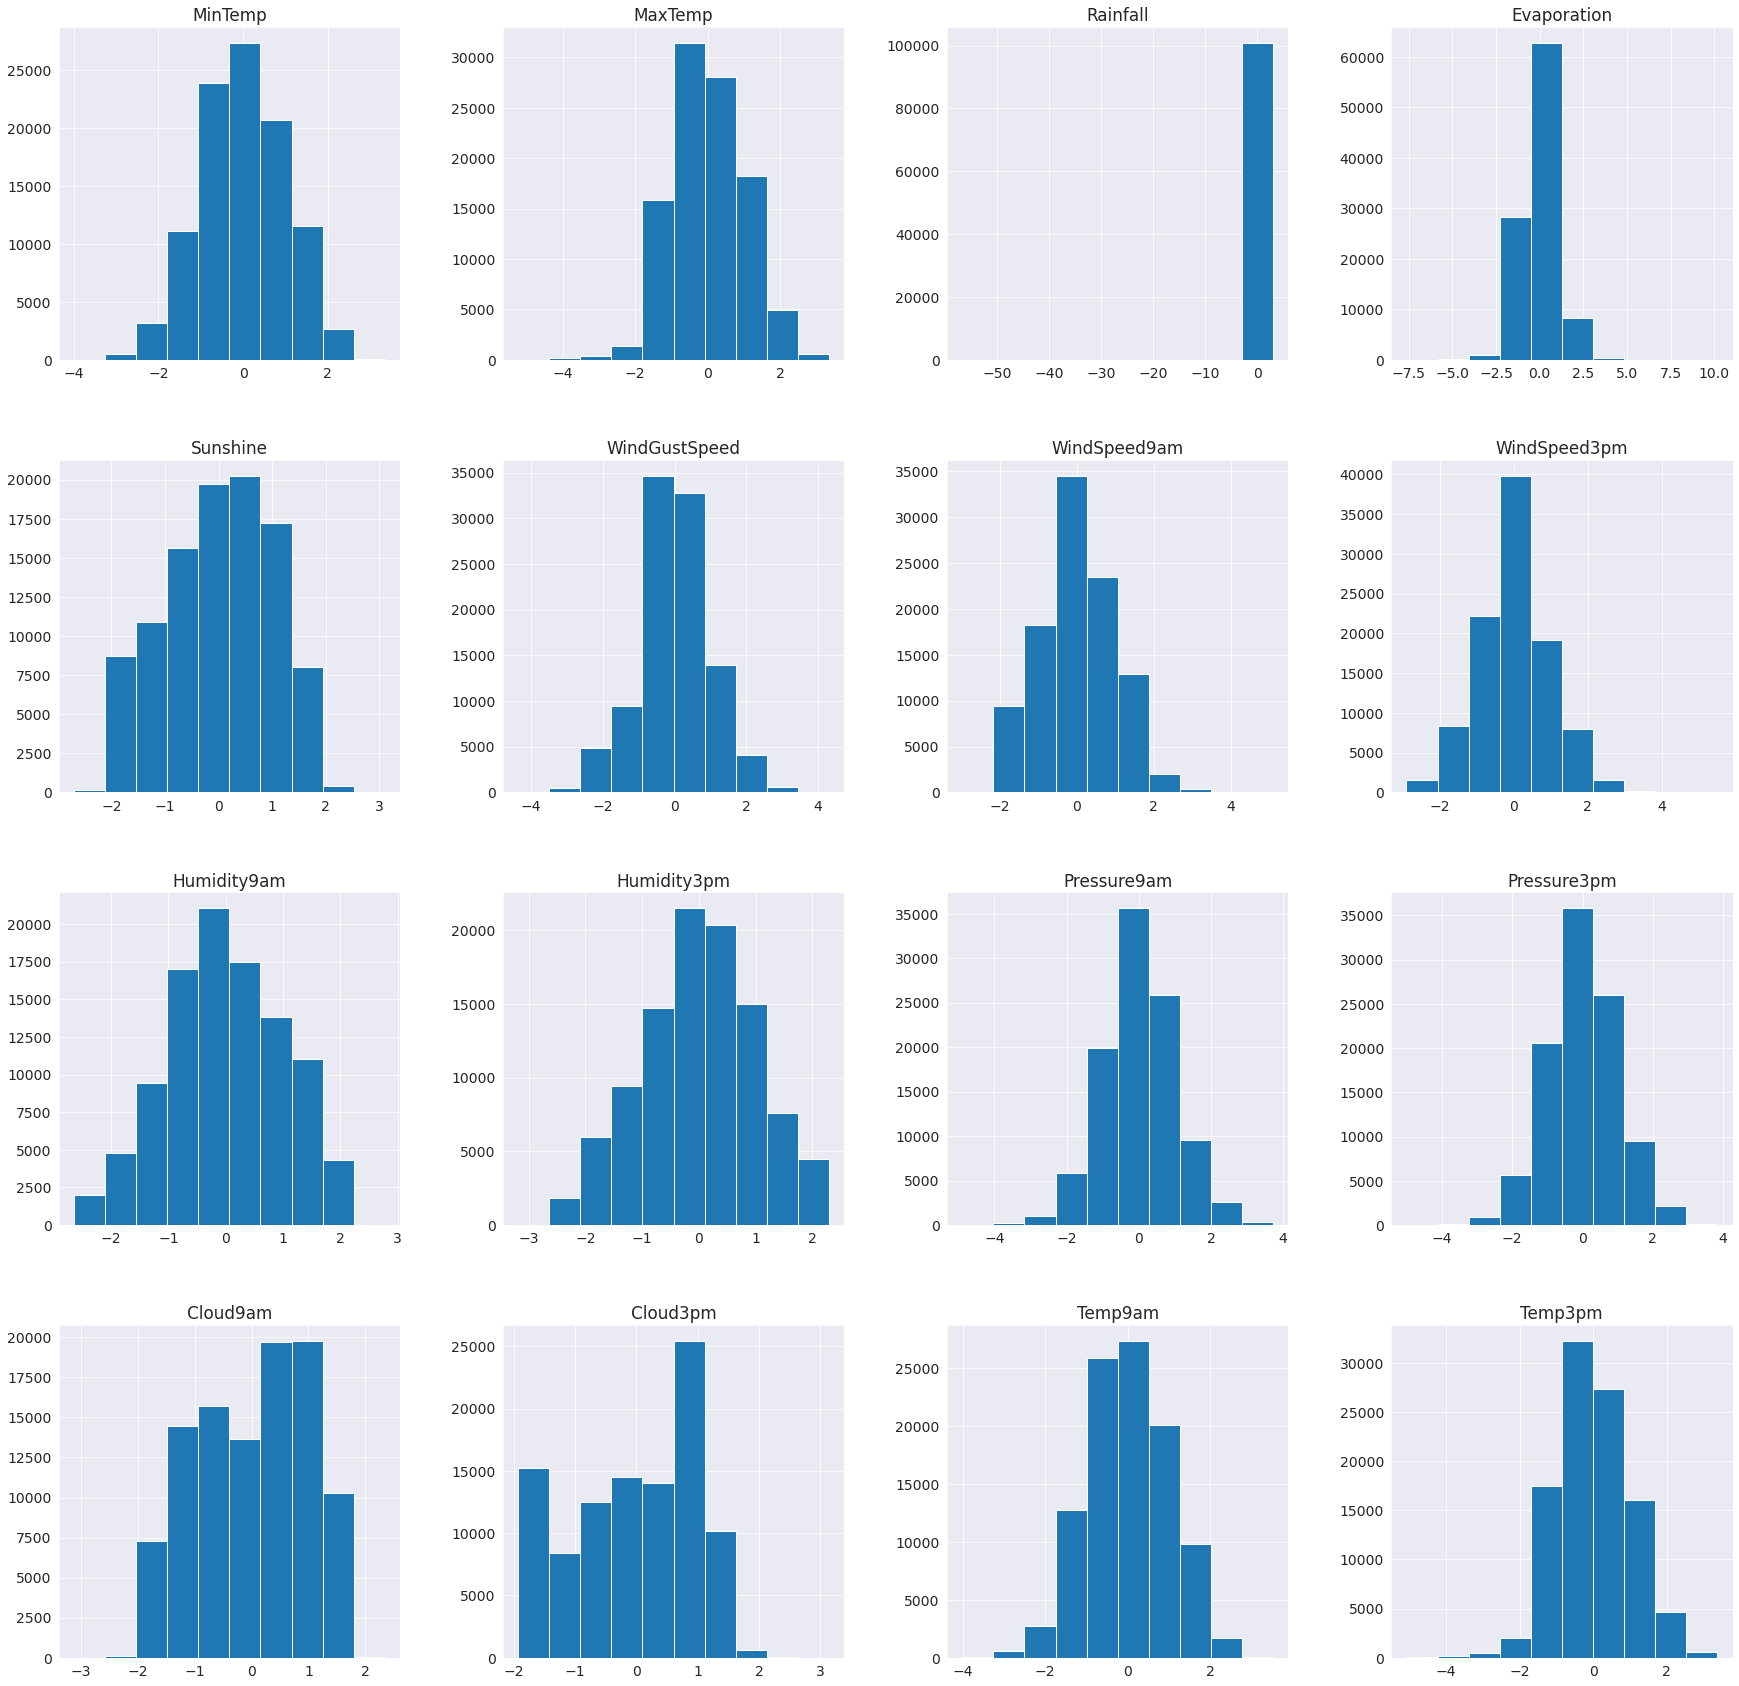

In [45]:
A_p[numeric_cols].hist(figsize=(30,30));

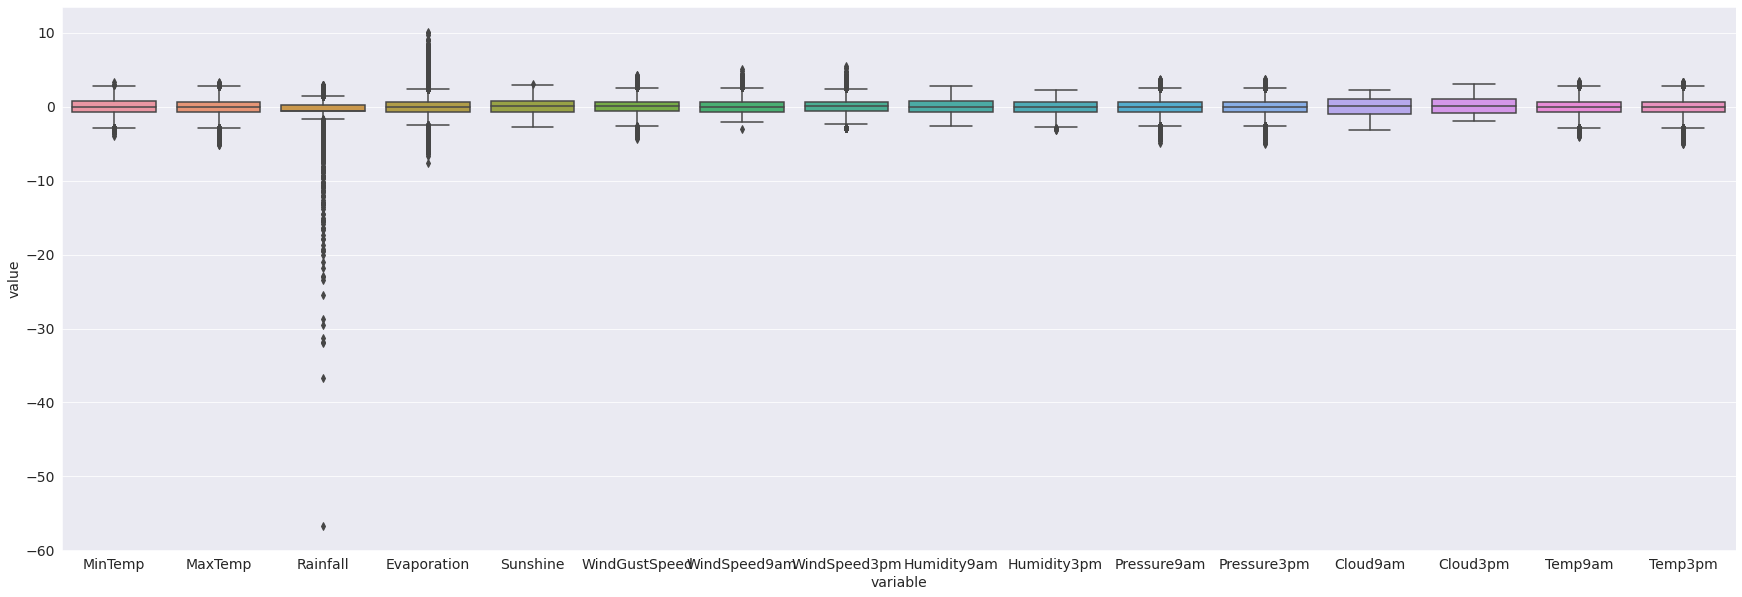

In [46]:
plt.figure(figsize=(30,10))
sns.boxplot(x='variable',y='value',data=A_p.melt());

It can be seen that this transformer has convert data into more Gaussian like data.

# Conclusion

One important thing to note is that while creating a machine learning model it is important to scale the validation and test sets too using the same scaler used to scale the input data.( which I have not done as this notebook is just for the purpose of visualization).

The purpose of this notebook is to give you a basic understanding of the scaling process and available methods. You can read further about each scaling methods by going through the links provided in the [references section](#References). There is no hard and fast rule for when to use which method (except the provided notes in each method). You can use any method according to use need.

In this notebook we have discussed some Techniques for scaling of data. There are other methods too which can be used for scaling the numeric data. I hope you find this notebook helpful while learning about scaling of numeric data.

# References

You can check out the following link for more information about Scaling and Scaling techniques.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html#sklearn.preprocessing.MaxAbsScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer